In [70]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings("ignore")
# Get a sentence from the user
sentence = input("HOW ARE YOU FEELING TODAY?")

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze the sentence
sentiment_scores = analyzer.polarity_scores(sentence)

# Display the score
print("Sentiment score:", sentiment_scores['compound'])

# Display the sentiment
if sentiment_scores['compound'] >= 0.05:
    sentiment="Positive"
elif sentiment_scores['compound'] <= -0.05:
    sentiment="Negative"
else:
    sentiment="Neutral"
#prediction percentage for the sentiment
img_path='happy.jpg'
# Load the trained model
model = tf.keras.models.load_model("emotion_model.h5")  # Replace with the actual model file
#display the image
# Load and preprocess the custom image
custom_image_path = img_path  # Replace with the actual path to your image
custom_image = image.load_img(custom_image_path, target_size=(224, 224))
custom_image = image.img_to_array(custom_image)
custom_image = np.expand_dims(custom_image, axis=0)
custom_image = custom_image / 255.0  # Normalize the image
# Make predictions
predictions = model.predict(custom_image,verbose=0)
class_index = np.argmax(predictions)
class_labels = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
predicted_class = class_labels[class_index]
facial_prediction_percentage=predictions[0][class_index] * 100


Sentiment score: 0.6588


In [71]:
data=pd.read_csv("Food and Emotion.csv")
#replace the string to lower case
data['Emotion']=data['Emotion'].str.lower()
#replace the string to lower case
data['Food']=data['Food'].str.lower()
#replace bored and boredom to neutral
data['Emotion']=data['Emotion'].replace(['bored','boredom'],'neutral')
#replace happy and happiness to happy
data['Emotion']=data['Emotion'].replace(['happy','happiness'],'happy')
#replace sad and sadness and stress and anger to negative
data['Emotion']=data['Emotion'].replace(['sad','sadness','stress','anger'],'sad')
data["Food"].replace('and','',regex=True,inplace=True)

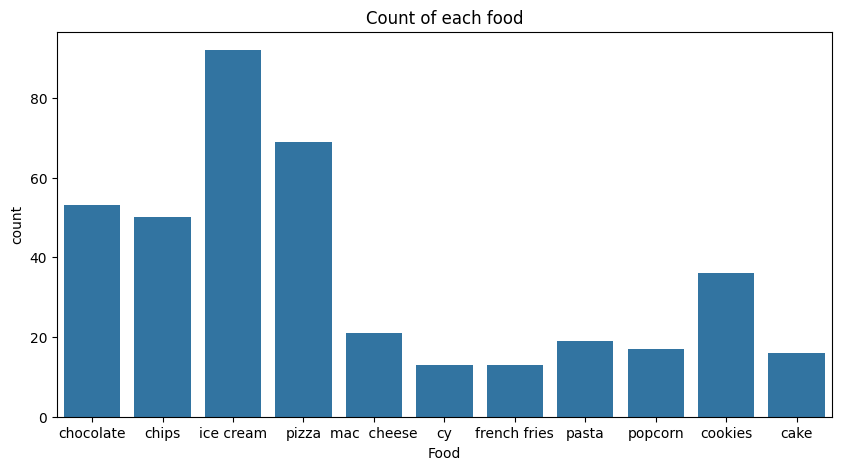

In [72]:
#plot the count of each food if count above 10
plt.figure(figsize=(10,5))
sns.countplot(x="Food",data=data[data["Food"].map(data["Food"].value_counts()) > 10])
plt.title("Count of each food")
plt.show()

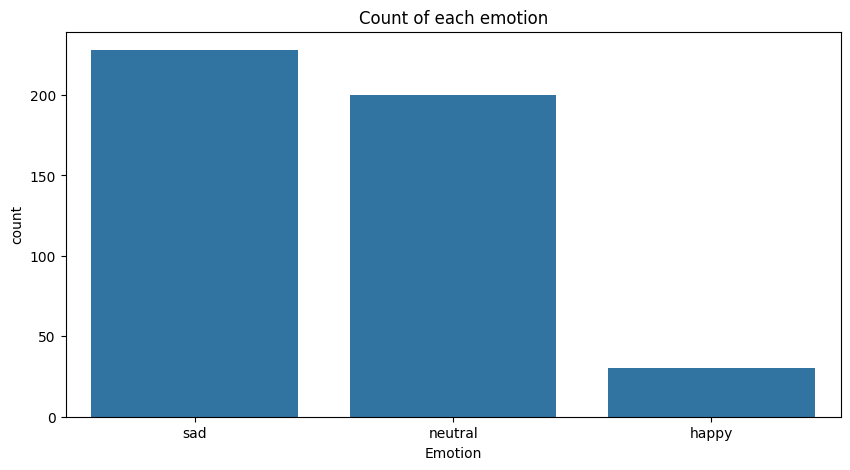

In [73]:
#plot the count of each emotion if count above 10
plt.figure(figsize=(10,5))
sns.countplot(x="Emotion",data=data[data["Emotion"].map(data["Emotion"].value_counts()) > 10])
plt.title("Count of each emotion")
plt.show()

In [74]:
#write a funcion to return the food for the emotion uaing the highest count
def food_for_emotion(emotion):
    emotion=emotion.lower()
    if emotion=='positive':
        emotion='happy'
    elif emotion=='negative':
        emotion='sad'
    elif emotion=='neutral':
        emotion='neutral'
    
    food=data[data["Emotion"]==emotion]
    return food["Food"].value_counts().index[0]
#display the emotion and food and the prediction percentage for the emotion

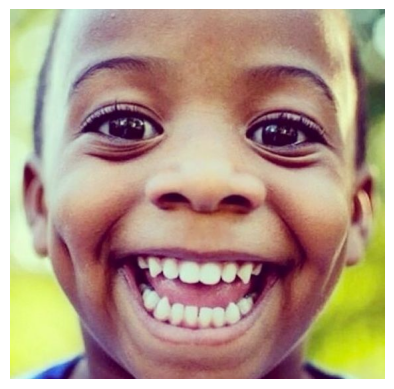

Textual Sentiment: Positive
Text= I'm doing great!
Prediction percentage:65.88%
Facial Emotion: happy
Prediction percentage:99.45%
Based on Facial Emotion
Emotion: happy
Recommended Food Item: pizza
Prediction percentage:99.45%


In [75]:
img = image.load_img(img_path)
plt.imshow(img) 
plt.axis('off')
plt.show()
print("Textual Sentiment:", sentiment)
print("Text=",sentence)
print('Prediction percentage:{0:.2f}%'.format(sentiment_scores['compound'] * 100))
textual_prediction_percentage=sentiment_scores['compound'] * 100
print("===============================================")
print("Facial Emotion:",predicted_class)
print('Prediction percentage:{0:.2f}%'.format(predictions[0][class_index] * 100))
if facial_prediction_percentage<textual_prediction_percentage:
    print("Based on Textual Sentiment") 
    predicted_class=sentiment
else:
    print("Based on Facial Emotion") 
    predicted_class=predicted_class
print("Emotion:",predicted_class)
print("Recommended Food Item:",food_for_emotion(predicted_class))
print('Prediction percentage:{0:.2f}%'.format(predictions[0][class_index] * 100))